# Class 6: Simulation and Law of Averages

## Feb. 25, 2025

By the end of this class you should be able to:

- understand how to write a function in Python;

- understand the role of empirical distributions (sample and statistic) and simulation; and

- understand the law of averages and it's relationship to empirical distributions.

## Functions

- We've seen many functions: `sum()`, `max()`, `groupby()`, and so on. We're going to explore how to create our own functions.

- We're going to use Python's `random` module, and in particular function `randint()`.

- Later in the lecture, we're going to do it another way entirely.

In [1]:
import random
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



Here we call function `randint()`, asking for a number in the range `1` to `6`.

In [2]:
random.randint(1, 6)

6

## So, what's a function?

Here is our first function definition. It has three parts:

1. Function header
    + `def <function name>():`.

2. Documentation string — "docstring" for short. (This is sometimes omitted.)

3. Function body
    + A sequence of Python statements that perform a computation.
    + If it ends with `return`, that announces the value of the function call.

In [3]:
def roll_die():
    """Simulate a die roll by returning a number between 1 and 6.
    """
    roll = random.randint(1, 6)
    return roll

Let's call it:

In [4]:
roll_die()

5

`roll_die` is also a Python variable. So … what is its value?

In [5]:
roll_die

<function __main__.roll_die()>

In [6]:
help(roll_die)

Help on function roll_die in module __main__:

roll_die()
    Simulate a die roll by returning a number between 1 and 6.



In [7]:
print(dir(roll_die)) # print out all the properties and methods of roll_die

['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [8]:
print(roll_die.__doc__)

Simulate a die roll by returning a number between 1 and 6.
    


In [9]:
print(roll_die.__name__)

roll_die


## A function is a value

A function is a value, so can we make an alias for `roll_die`?

In [10]:
waffles = roll_die
waffles()

6

In [11]:
waffles.__name__

'roll_die'

## Platonic solids: octahedrons and dodecahedrons and icosahdrons

Fun reading: [The geometry of weird-shaped dice](https://skullsinthestars.com/2017/03/09/the-geometry-of-weird-shaped-dice/).

![dice.jpg](https://skullsinthestars.files.wordpress.com/2017/03/platonicsolids.jpg?w=457&h=343)


- Often, we want to ask a function to calculate some information for us based on data we give it. 

- Below is a function that allows us to simulate any shape of dice.

In [12]:
def roll_die(num_sides):
    """Simulate a die roll by returning a number between 1 and num_sides.
    """
    roll = random.randint(1, num_sides)
    return roll

In [13]:
roll_die(20)

3

In this function call, we're passing `20` in, and `num_sides` is a *temporary* name for that value.

## Local variables

`num_sides` and `roll` are _local_ to the function. They only exist while the function is being called.

In [15]:
print(num_sides)

NameError: name 'num_sides' is not defined

The only place you can use `print(num_sides)` is in the function body for `roll_die`.

## Values go in, a value comes out

- When we **call** a function, the arguments need to be evaluated before we can do the function call.

- When a function **returns**, the return value is used as the value of the function call.

## When do you write a function?

If you find yourself copying and pasting code, it's time to write a function that does the same thing.

If you think of a good domain-specific name for a computation or simulation you're doing, make a function so the rest of your code is more readable.

Follow the conventions for writing variable names:

> - make all letters lowercase (so `amount`, not `Amount` or `AMOUNT`)
> - separate words with underscores so (`tax_rate`, not `tax rate` or `taxrate`)


## You try it

Write a function that takes in the number of minutes and returns the equivalent number of hours.


1. What's a good name for the function? It helps to think of a short verb phrase, because the function does something.


2. There are 60 minutes in an hour, so divide the number of minutes by 60 to get the equivalent number of hours.

In [17]:
def change_min_to_hour(minute):
    """Change minutes to hours by dividing by 60.

    Arguments:
        minute (float): time in minutes.
    """
    hour = minute / 60
    return hour

Now call it and check whether you get the right answer:

In [19]:
# Call your function here
change_min_to_hour(180)

3.0

In [20]:
change_min_to_hour(0)

0.0

In [21]:
change_min_to_hour(-0.5)

-0.008333333333333333

In [22]:
help(change_min_to_hour)

Help on function change_min_to_hour in module __main__:

change_min_to_hour(minute)
    Change minutes to hours by dividing by 60.
    
    Arguments:
        minute (float): time in minutes.



## Iteration
### Do the same thing to each item in a list

Do you remember for loops from [Week 3](../../week03/lecture/Class3_GGR274_KR.ipynb#for-loops)?

In [23]:
minutes = [60, 58, 32, 93]
for minute in minutes:
    print(minute)

60
58
32
93


Each _iteration_ of the loop makes `minute` the name of the next number, in order from left to right.

This works with any iterable, like `str` and `Series`.

In [24]:
for letter in "GGR274":
    print(letter)

G
G
R
2
7
4


## Iterate through a `Series`

Here's a `Series`.

In [25]:
import pandas as pd
timeuse = pd.read_csv("gss_tu2016_main_file.csv")

persdur = timeuse["persdur"]

/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_46576/1893467730.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


- **Goal:** calculate the sum of the numbers using a `for` loop (rather than calling `sum`).

- Once we have this basic structure, we can start to get fancy with it.

- We'll start with keeping a running total. 

We can access values of `persdur` by indexing with `[]`.

In [26]:
persdur.head()

0    30
1    30
2    30
3    75
4    15
Name: persdur, dtype: int64

In [27]:
running_sum = 0 # this will be a variable for storing a running total
persdur[0] # the first value

30

In [28]:
running_sum = running_sum + persdur[0] # add first value in series to running_sum
running_sum

30

In [29]:
# add second value in series to running_sum
# running_sum is now first value plus second value of persdur

running_sum = running_sum + persdur[1] 
running_sum

60

In [30]:
# add third value in series to running_sum
# running_sum is now first plus second plus third values of persdur

running_sum = running_sum + persdur[2]
running_sum

90

In [31]:
# add fourth value in series to running_sum
# running_sum is now first plus second plus third values 
# plus fourth values of persdur

running_sum = running_sum + persdur[3]
running_sum

165

In [32]:
# add fifth value in series to running_sum
# running_sum is now first plus second plus third values 
# plus fourth plus fifth values of persdur

running_sum = running_sum + persdur[4]
running_sum

180

## An algorithm for _summing_ a Series or list of numbers


1. Start the _running sum_ at 0. 

2. Access the number in the current iteration.

3. Add the number to the _running sum_ and store the _running sum_.

4. Repeat _step 2_ and _step 3_ until we reach the end of the numbers.

5. Return the _running sum_.

In [34]:
running_sum = 0   # star thte running sum at 0

for pdur in persdur: # access the number
    running_sum = running_sum + pdur # add teh number to the running sum and store the sum

running_sum   # return the running sum

831829

Create a function for summing a list or `Series`.

In [35]:
def sum_number(numbers):
    """Sum a list or pandas Series:
    
    Arguments:
        numbers (list, Series, or column of a DataFrame): numbers to sum up
    
    """
    running_sum = 0
    
    for num in numbers:
        running_sum = running_sum + num
        
    return running_sum

In [38]:
help(sum_number) 

sum_number(persdur)

Help on function sum_number in module __main__:

sum_number(numbers)
    Sum a list or pandas Series:
    
    Arguments:
        numbers (list, Series, or column of a DataFrame): numbers to sum up



831829

## Iterating a constant amount of times

- Sometimes we want to repeat something an exact number of times rather than once for each item in a list.

- To do this, The Python function `range` generates a sequence of numbers that is *iterable*, so we can use it in a for loop.

In [39]:
for x in range(5):
    print(x)

0
1
2
3
4


`range(stop)` returns a sequence of numbers starting from 0 to `stop-1` increasing by `1`. 

In [40]:
for x in range(1, 5):
    print(x)

1
2
3
4


`range(start, stop)` returns a sequence of numbers starting from `start` to `stop-1` increasing by `1`. 

> You can optionally specify `step` in `range(start, stop, step)` to adjust the increasing step.

## Roll a die

Let's create a function that rolls a die with an arbitrary number of **sides** (`nums_sides`) an arbitrary number of **times** (`num_rolls`).

In [41]:
def roll_a_die(num_rolls, num_sides):
    """Roll a die with an arbitrary number of sides an arbitrary number of times.
       returns the total of all roll values.
       
    Arguments:
        num_rolls (int): number of die rolls
        num_sides (int): number of sides of the die
    """
    die_sum = 0
    
    print(f"You are rolling a {num_sides}-sided die {num_rolls} times!  Good luck.\n")
    
    for _ in range(num_rolls):
        print(f"This is roll number: {_ + 1}")
        roll_value = random.randint(1, num_sides)
        print(f"Value of die on this roll is: {roll_value}")
        die_sum = roll_value + die_sum
        print(f"Running total so far is: {die_sum} \n")

    return die_sum

In [42]:
roll_a_die(num_sides=6, num_rolls=5)

You are rolling a 6-sided die 5 times!  Good luck.

This is roll number: 1
Value of die on this roll is: 4
Running total so far is: 4 

This is roll number: 2
Value of die on this roll is: 6
Running total so far is: 10 

This is roll number: 3
Value of die on this roll is: 3
Running total so far is: 13 

This is roll number: 4
Value of die on this roll is: 2
Running total so far is: 15 

This is roll number: 5
Value of die on this roll is: 2
Running total so far is: 17 



17

## Question

- Explain what each line of `roll_a_die` does.

## Empirical Distributions

- In data science, the word "empirical" means "observed". 

- Empirical distributions are distributions of observed data, such as data in the time use survey.

- We can simulate data and see what the empirical distribution looks like. 

## Toss a die ten times

**A simple experiment**

- Roll a die multiple times and keep track of which face appears. 
- We will conduct the experiment without a physical die.

- We will use the `numpy` library to create a virtual six-sided fair die.
- The `arange()` function returns evenly spaced values within an interval.

In [43]:
import numpy as np

die_sides = np.arange(start=1, stop=7, step=1)
die_sides

array([1, 2, 3, 4, 5, 6])

> This returns a `numpy` array which is a different python object. It is also iterable.

Alternatively, we could have used the `array()` function in `numpy`.

In [44]:
np.array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

- We will store the virtual die inside a `Series`.

In [45]:
die = pd.Series(die_sides)
die

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

- Now, we can use the `pandas` `sample()` function to take a random *sample* of `die`.  

- `replace=False` means that values that are already selected cannot be selected again.  This is the default for this parameter.

In [47]:
die.sample(n=1, replace=False)

2    3
dtype: int64

- `die.sample(n=1, replace=False)` is a **simulation** of tossing a six-sided die once.

- How can we toss the die, say, 10 times?

- Change `n` to 10

In [48]:
die.sample(n=10)

ValueError: Cannot take a larger sample than population when 'replace=False'

- ... and the `replace` parameter to `True` in `sample()`.

- This means we are rolling the same die each time, not a die with a side removed with each roll.

In [49]:
# using pandas sample function

roll_10 = die.sample(n=10, replace=True)
roll_10

4    5
3    4
2    3
0    1
5    6
5    6
1    2
4    5
3    4
5    6
dtype: int64

We can achieve the same simulation without using `pandas` or `numpy`.

In [52]:
# using base python random.choice
for _ in range(10):
    roll = random.choice(die) # equivalent to `die.sample(1)`
    print(roll)
    

3
6
2
5
3
5
3
1
5
2


We will use built-in `pandas` functions instead
since we will be working in `pandas` most of the time.

## What values of the die should we expect?

- If the die is fair then we would expect each side of the die (1 through 6) to have an equal chance (1/6) of appearing.

- So, in 10 rolls of the die we would expect each side to appear approximately 10/6 (~ 2) times.

In [59]:
die_bins = np.arange(start=0.5, stop=7.5, step=1) # equivalen to `np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])``

- `np.arange(start=0.5, stop=6.6, step=1)` creates a `numpy` array with elements 0.5, 0.5 + 1, 0.5 + 1 + 1, 0.5 + 1 + 1 + 1, etc. 
- We will use the array to create the histogram bins. 

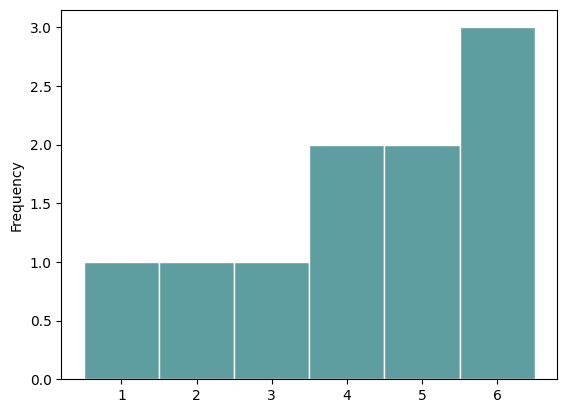

In [61]:
roll_10.plot.hist(bins=die_bins, edgecolor="white", color="cadetblue");

> You can check the list of "named" colours available for use [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

- The histogram above is called the **Empirical Distribution** of 10 rolls of a fair die.

- What happens if the die is rolled 10,000 times?

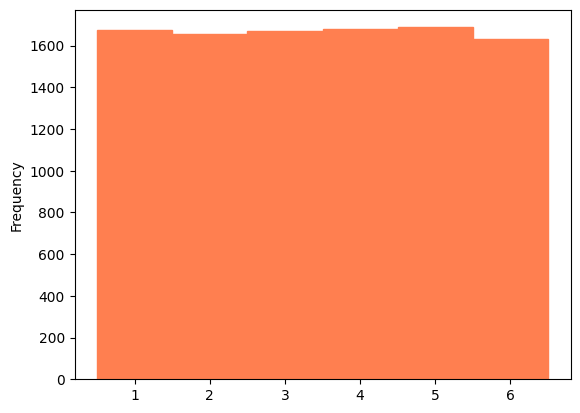

In [62]:
roll_10000 = die.sample(n=10000, replace=True) 
roll_10000.plot.hist(bins=die_bins, edgecolor="coral", color="coral");

## Plotting in matplotlib

- We can create the same histogram using `matplotlib.pyplot()` directly (`pandas` plotting functions use this library).

- `matplotlib.pyplot()` gives us greater flexibility in the types of plots we can create.

- the syntax is similar to `pandas.DataFrame.plot.hist()`

- `ylabel()` and `xlabel()` allow us to label the vertical and horizontal axes.

- If the widths of the histogram bins are 1 then the setting the parameter `density=True` will display values on the vertical axis of the that correspond to the proportion of observed values falling into a bin. 

- We can interpret these proportions as the **probability** of a value falling in the bin.

- If the width of the bins is not equal to 1 then `density=True` will not produce probabilities on the vertical axis.

Text(0.5, 0, 'Die value')

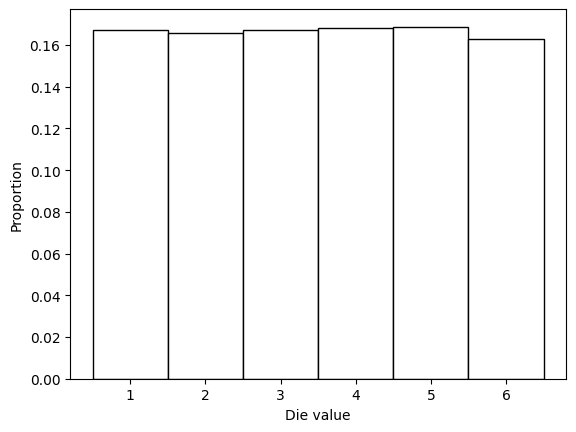

In [63]:
import matplotlib.pyplot as plt

plt.hist(roll_10000, bins=die_bins, edgecolor="black", color="white", density=True)
plt.ylabel("Proportion")
plt.xlabel("Die value")

## Probability

- Since the widths of the histogram bins are 1 the values on the vertical axis of the histogram are probabilities.

- The theoretical probability of rolling a 1, 2, 3, 4, 5, or 6 in 10,000 rolls of a six-sided fair die is approximately 0.17 (= 1/6).

- The observed probabilities can be directly calculated using `value_counts()` then dividing by the number simulations.

In [64]:
roll_10000.value_counts() / len(roll_10000)

5    0.1688
4    0.1680
1    0.1673
3    0.1671
2    0.1657
6    0.1631
Name: count, dtype: float64

As we increase the number of rolls in the simulation, the area of each bar gets closer to 16.67%, which is the area of each bar in the probability histogram.

## The Law of Averages

What we have observed previously is an instance of a general rule called the *law of averages*:

> If an experiment with a random component is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appears gets closer and closer to 1/6.

Here "independently and under identical conditions" means that every repetition is performed in the same way regardless of the results of all the other repetitions.

The function `roll_die()` has one argument `num_rolls` that represents the number of times a die is rolled.

In [65]:
def roll_die(num_rolls):
    die_results = die.sample(n=num_rolls, replace=True)
    return die_results

- The function `empirical_hist()` has one argument `obs_die_vals` that represents the observed values of rolling a single-sided die.

- The function produces the quantitative distribution of a die, and a histogram.

In [66]:
def empirical_hist(obs_die_vals):
    print(obs_die_vals.value_counts() / len(obs_die_vals))
    plt.hist(obs_die_vals, bins=die_bins, edgecolor="white", color="darkgrey", density = True)
    plt.ylabel("Proportion")
    plt.xlabel("Die value")

- The parameter value for `empirical_hist()` can be obtained by using the function `roll_die` above.

- This can be used directly as the parameter value for `empirical_hist()`.

1    0.5
2    0.3
3    0.2
Name: count, dtype: float64


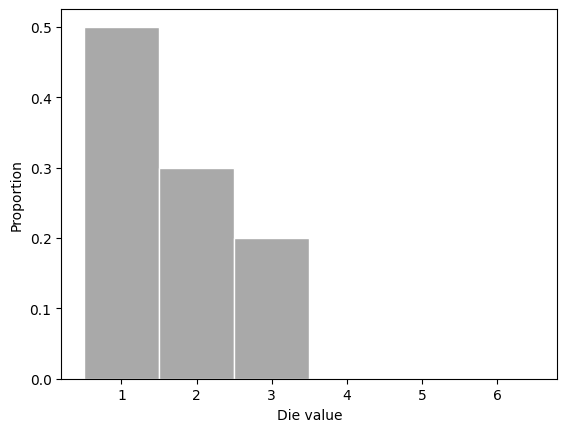

In [67]:
# this is a long version of the code below
# roll_values = roll_die(10)
# empirical_hist(roll_values)

empirical_hist(roll_die(10));

## Interactive exploration of simulating a die roll

We can use the `interact()` function from `ipywidgets` library to interact directly with distribution. 


In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

def die_sim_plot(n):
    roll_die = die.sample(n, replace=True)
    print(roll_die.value_counts() / n)
    plt.hist(roll_die, bins=die_bins, edgecolor="white", color="darkgrey", density=True)


interact(die_sim_plot, n = widgets.IntSlider(min=10, max=500, step=5, value=10))

## Questions

- What does the value `n` on the slider represent?

- What do the numbers above the histogram represent?

- Describe what the histogram represents.

- Describe the pattern in the histogram as `n` gets larger.  

## Sampling from a Population

The law of averages also holds when the random sample is drawn from individuals in a large population.

```
 persdur            Duration - Personal activities

           VALUE  LABEL
               0  No time spent doing this activity
            9996  Valid skip
            9997  Don't know
            9998  Refusal
            9999  Not stated


 luc_rst            Population centre indicator

           VALUE  LABEL
               1  Larger urban population centres (CMA/CA)
               2  Rural areas and small population centres (non CMA/CA)
               3  Prince Edward Island
               6  Valid skip
               7  Don't know
               8  Refusal
               9  Not stated
```




In [68]:
timeuse = pd.read_csv("gss_tu2016_main_file.csv")

important_cols = ["CASEID", "persdur", "luc_rst"]

timeuse_subset = timeuse[important_cols]
print(timeuse_subset.shape)
timeuse_subset.head()

(17390, 3)


,CASEID,persdur,luc_rst
0,10000,30,1
1,10001,30,1
2,10002,30,1
3,10003,75,1
4,10004,15,1


Transform time spent on personal activities from minutes to hours, and add this new column called `'persdur_hour'` to `timeuse_subset`.

In [69]:
timeuse_subset = timeuse_subset.copy()
timeuse_subset["persdur_hour"] = (timeuse_subset["persdur"] / 60)
timeuse_subset.head()

,CASEID,persdur,luc_rst,persdur_hour
0,10000,30,1,0.50
1,10001,30,1,0.50
2,10002,30,1,0.50
3,10003,75,1,1.25
4,10004,15,1,0.25


Compute a summary of the distribution of `'persdur_hour'`.

In [70]:
timeuse_subset["persdur_hour"].describe()

count    17390.000000
mean         0.797229
std          0.900105
min          0.000000
25%          0.250000
50%          0.583333
75%          1.000000
max         15.083333
Name: persdur_hour, dtype: float64

Let's zoom in on respondents that had a personal activities time between 0.25 and 3 hours.

In [71]:
zoom = (timeuse_subset["persdur_hour"] >= 0.25) & (timeuse_subset["persdur_hour"] <= 3)

timeuse_subset.loc[zoom].describe()

,CASEID,persdur,luc_rst,persdur_hour
count,13004.000000,13004.000000,13004.000000,13004.000000
mean,18669.473624,55.479314,1.248693,0.924655
std,5032.139991,33.644386,0.494974,0.560740
min,10000.000000,15.000000,1.000000,0.250000
25%,14294.750000,30.000000,1.000000,0.500000
50%,18675.500000,45.000000,1.000000,0.750000
75%,23010.500000,70.000000,1.000000,1.166667
max,27389.000000,180.000000,3.000000,3.000000


## Empirical Distribution of the Sample

- Let's think of the 13,004 respondent times (hours) as a population, and draw random samples from it with replacement. 

- Below is a histogram of the distribution.

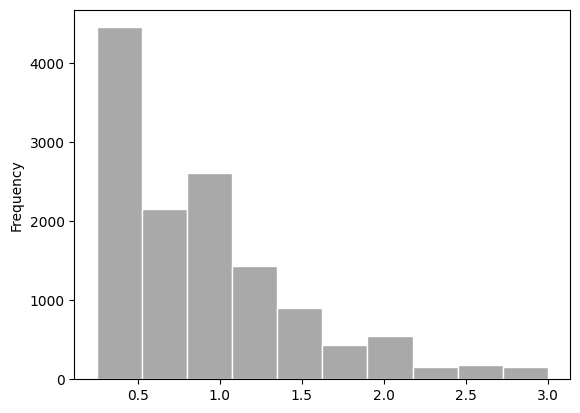

In [72]:
persdur_zoom = timeuse_subset.loc[zoom, "persdur_hour"]

persdur_zoom.plot.hist(bins=10, edgecolor="white", color="darkgrey");

A random sample of 10 ...

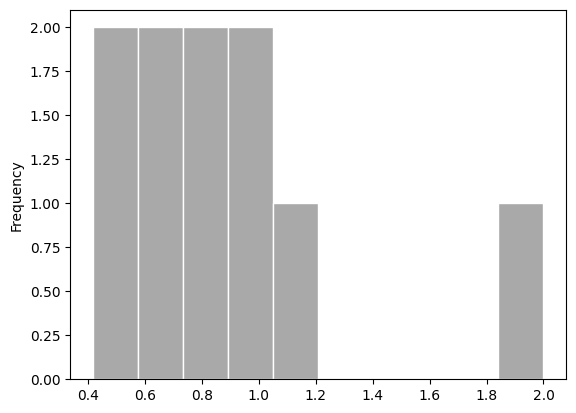

In [73]:
persdur_zoom.sample(
    10, 
    replace=True
    ).plot.hist(bins=10, edgecolor="white", color="darkgrey");

A random sample of 100 ...

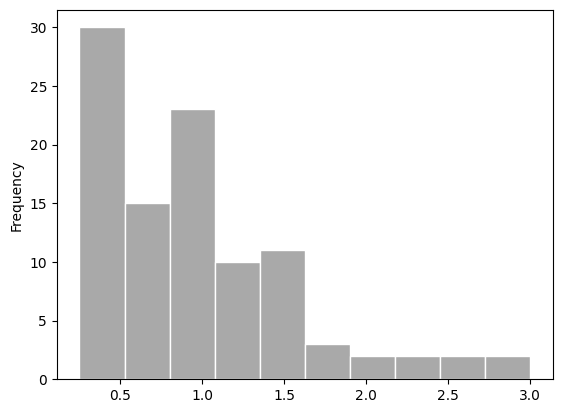

In [74]:
persdur_zoom.sample(
    100, 
    replace=True
    ).plot.hist(bins=10, edgecolor="white", color="darkgrey");

A random sample of 1000 ...

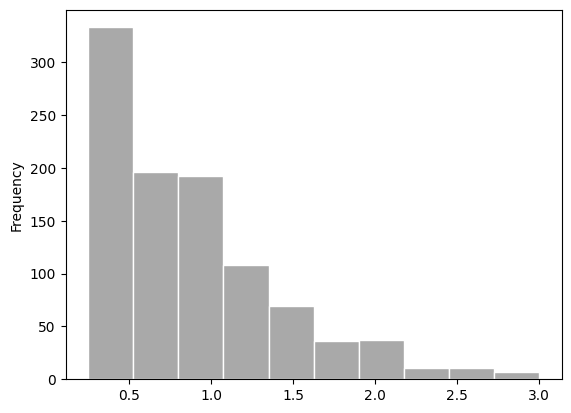

In [75]:
persdur_zoom.sample(
    1000, 
    replace=True
    ).plot.hist(bins=10, edgecolor="white", color="darkgrey");

- The values that occur with the least frequency are less likely to occur in small random samples.
- As the size of the random sample increases the sample will resemble the population, with high probability.

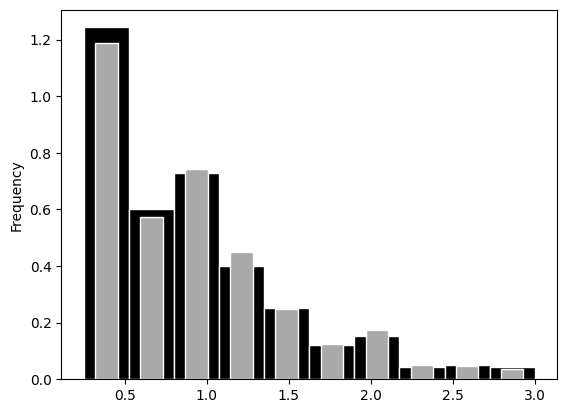

In [76]:
# plot the density histogram of the 1000 random sample over the population density histogram
persdur_zoom.plot.hist(bins=10, edgecolor="white", color="black", density=True);
# rwidth=.5 adjusts the width of the bars to 0.5 relative to the bin width
persdur_zoom.sample(1000, replace=True).plot.hist(bins=10, edgecolor="white", color="darkgrey", density=True, rwidth=.5);

## Interactive exploration of empirical distribution of a sample

In [ ]:
def emp_hist_plot(n):
    persdur_zoom.sample(n, replace = True).plot.hist(bins=10, edgecolor="white", color="darkgrey");

interact(emp_hist_plot, n = widgets.IntSlider(min = 10, max= 500, step=50, value=10))

The histogram of the "population".

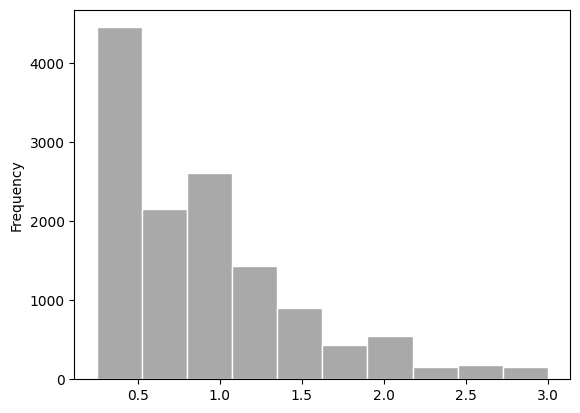

In [77]:
persdur_zoom.plot.hist(bins=10, edgecolor="white", color="darkgrey");

## Question

- Describe how the empirical histogram changes as the the value `n` gets larger.

## Empirical Distribution of a Statistic

The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

The resemblance is visible in two histograms: the empirical histogram of a large random sample is likely to resemble the histogram of the population.

## Statistical Parameter

Numerical quantities associated with a (statistical) population are called *statistical parameters* or *parameters*. For the population of respondents in `persdur_zoom`, we know the value of the parameter "median time (hours) spent on personal activities":

In [78]:
persdur_zoom.median()

0.75

More frequently, we are interested in parameters that are unknown to us.

- In a population of voters, what percent will vote for Candidate A?

- In a population of TikTok users, what is the largest number of followers for a user?

- In a population of Air Canada flights, what is the median departure delay?

- In a population of commercial air flights, what is the average [fatal accident rate](https://www.cnn.com/2025/02/19/business/airplane-crashes-statistics/index.html)?

![](stats.png)

## Statistic

For this, we will rely on data from a large random sample drawn from the population.

A *statistic* (note the singular!) is any number computed using the data in a sample. The sample median, therefore, is a statistic. 

Remember that `persdur_zoom.sample(100)` contains a random sample of 100 respondents from `persdur_zoom`. The observed value of the sample median is:

In [79]:
persdur_zoom.sample(100).median()

0.75

Our sample – one set of 100 people – gave us one observed value of the statistic. This raises an important problem of inference:

**The statistic could have been different.**

A fundamental consideration in using any statistic based on a random sample is that *the sample could have come out differently*, and therefore the statistic could have come out differently too.

In [80]:
persdur_zoom.sample(100).median()

1.0

Run the cell above a few times to see how the answer varies. Often it is equal to 0.75, the same value as the population parameter. But sometimes it is different.

## Example: Poll Tracker

-  Consider [the polling averages of the Canadian parties](https://newsinteractives.cbc.ca/elections/poll-tracker/canada/) as of today.

-  Each poll consists of responses from a random sample of survey participants.

-  Polls even conducted during the same period may not result in the same results.

![](korea-poll-graph-2022.png)

_Source: https://poll-mbc.co.kr/bk/2022_president.html_

## Uh oh...

- We don't know the population parameter.

- Our statistic from a random sample may be a good estimate, but it may be not because it's going to be different with a different sample.


**Just how different could the statistic have been?**   
One way to answer this is to simulate the statistic many times and note the values.  
A histogram of those values will tell us about the **distribution of the statistic**.

## Simulating a Statistic

We will simulate the sample median using the steps below.  You can replace the sample size of 1000 by any other sample size, and the sample median by any other statistic.

**Step 1: Decide which statistic to simulate.** We have already decided that: we are going to simulate the median of a random sample of size 1000 drawn from the population of time use survey respondents that had a median time spent on personal activities between 0.25 and 3.0 hours.

**Step 2: Define a function that returns one simulated value of the statistic.** Draw a random sample of size 1000 and compute the median of the sample. We did this in the code cell above. Here it is again, encapsulated in a function.

In [81]:
def random_sample_median():
    return persdur_zoom.sample(100).median()

In [82]:
random_sample_median()

0.6666666666666666

**Step 3: Decide how many simulated values to generate.** Let's do 5,000 repetitions.

**Step 4: Use a `for` loop to generate a list of simulated values.** Start by creating an empty list in which to collect our results. We will then set up a `for` loop for generating all the simulated values. The body of the loop will consist of generating one simulated value of the sample median, and appending it to our collection list.

The simulation takes a noticeable amount of time to run. That is because it is performing 5000 repetitions of the process of drawing a sample of size 1000 and computing its median. That's a lot of sampling and repeating!

Let's break down this step a bit further:

- set up an empty list called `sim_medians`.

In [83]:
sim_medians = [] # empty list

- Use the `append` function to append values to `sim_medians`.

In [84]:
sim_medians.append(random_sample_median())
sim_medians

[0.75]

- Run the cell above several times and you will see that values keep getting appended to `sim_medians`.

- Each time the cell is run a random sample of 100 is drawn, the median is calculated then appended to the list.

In [85]:
sim_medians = []

num_sims = 5000 

# how do we tell Python we want to run `num_sim` times?
for _ in range(num_sims):
    sim_medians.append(random_sample_median())

## Empirical Distribution of a Statistic

We can now examine the **empirical frequency distribution** of the median statistic.

Create a `pandas` series using the list `sim_medians` then use the `describe` function to describe the distribution.

In [86]:
pd.Series(sim_medians).describe()

count    5000.000000
mean        0.801642
std         0.082766
min         0.500000
25%         0.750000
50%         0.750000
75%         0.833333
max         1.000000
dtype: float64

- The distribution of the median can be visualized using a histogram.  

- The histogram can tell us how frequent certain values of the median occur in random samples.

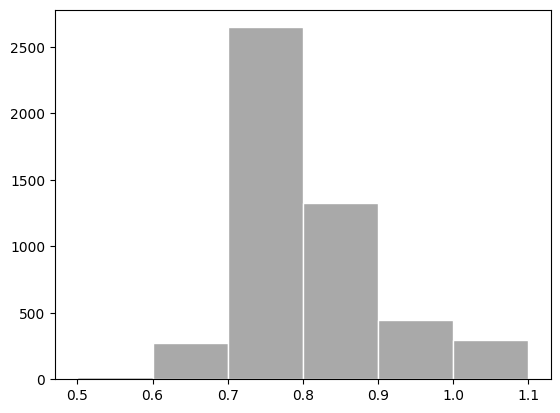

In [87]:
# create bins of length 0.1 
# starting at 0.5 and ending at 1.1

median_bins = np.arange(0.5, 1.1, 0.1) 

# use the bins to plot empirical distribution of medians

plt.hist(sim_medians, bins=median_bins, edgecolor="white", color="darkgrey");

The exact counts of medians in each interval can be examined using `pd.cut` and `value_counts`.

In [88]:
# create a pandas series so we can use cut function
sim_means_series = pd.Series(sim_medians)

# frequency of values in each bin
print(pd.cut(sim_means_series, median_bins).value_counts())

# relative frequency (proportion) of values in each bin
pd.cut(sim_means_series, median_bins).value_counts() / num_sims

(0.7, 0.8]    2646
(0.8, 0.9]    1325
(0.9, 1.0]     447
(1.0, 1.1]     295
(0.6, 0.7]     272
(0.5, 0.6]      11
Name: count, dtype: int64


(0.7, 0.8]    0.5292
(0.8, 0.9]    0.2650
(0.9, 1.0]    0.0894
(1.0, 1.1]    0.0590
(0.6, 0.7]    0.0544
(0.5, 0.6]    0.0022
Name: count, dtype: float64

- The histogram shows that the median values between 0.70 and 0.80 have the highest probability of occurring (viz. 0.5314).

- This means that a random sample would rarely yield a median value in the range of 0.5 - 0.6 or 1.0 - 1.1.

## What can we learn from simulation?

- If we could generate all possible random samples of size 1000, we would know all possible values of the statistic (the sample median), as well as the probabilities of all those values. We could visualize all the values and probabilities in the probability histogram of the statistic.

- But in many situations including this one, the number of all possible samples is large enough to exceed the capacity of the computer, and purely mathematical calculations of the probabilities can be intractably difficult.

- This is where empirical histograms come in.

- We know that by the Law of Averages, the empirical histogram of the statistic is likely to resemble the probability histogram of the statistic, if the sample size is large and if you repeat the random sampling process numerous times.

- This means that simulating random processes repeatedly is a way of approximating probability distributions *without figuring out the probabilities mathematically or generating all possible random samples*. 

- Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.

## Review of today's class

- understand that a function definition creates a function object and a variable name for that object

- understand how to write a function call in Python

- understand that a function call is an expression that produces a value, just like mathematical expressions

- explain how a function call works: how it passes information to the parameters

- understand that any variables created during function execution are local to the current function call, and when the function ends the variables disappear

- understand that the return statement announces the value of the function call

- describe the parts of a function: name, parameters, body

- understand how to write a `for` loop in Python

- understand the role of empirical distributions (sample and statistic) and simulation

- understand the law of averages and it's relationship to empirical distributions
